In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
import piplite
await piplite.install("palettable")
await piplite.install("seaborn")
import VisualizeNN as VisNN
import pyodide
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

## 1. 座標軸データにおける学習

In [4]:
data = pd.read_csv(pyodide.http.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/xydata.csv"))
data.head()

,x,y,label
0,0.372492,0.265037,0
1,0.701512,0.899264,0
2,0.380926,0.552316,1
3,0.285617,0.138484,0
4,0.934252,0.407264,0


データが何を意味しているのか、グラフで見る（散布図）

<AxesSubplot:xlabel='x', ylabel='y'>

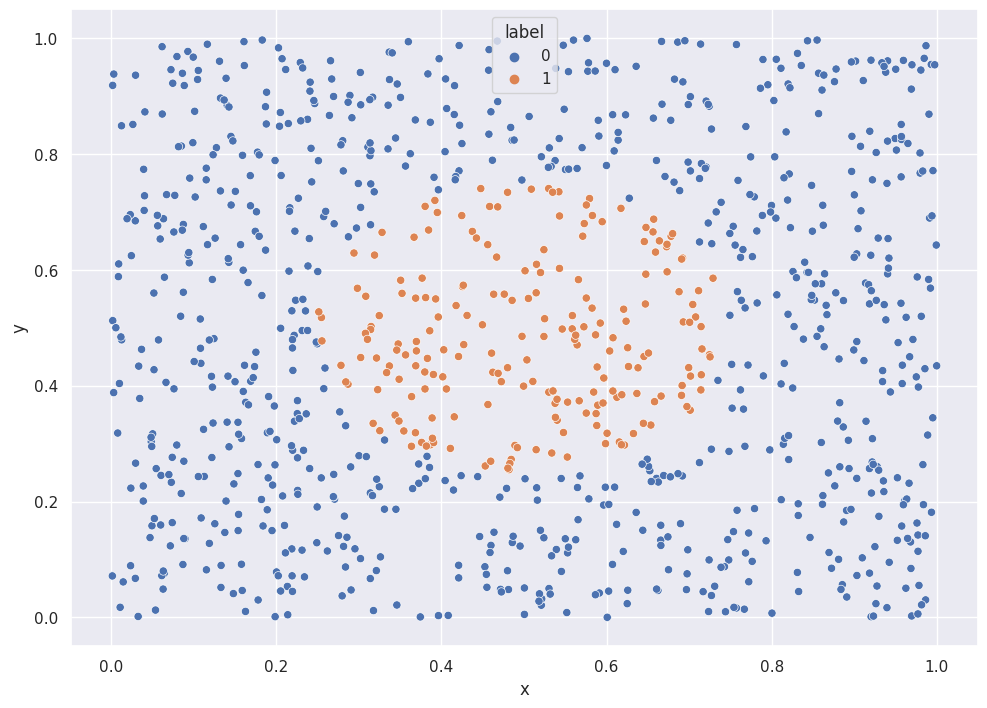

In [10]:
sns.scatterplot(data = data, x = "x", y = "y", hue = "label")

ラベルが１の場合、真ん中の円の中の点であり、０はそれ以外の点であることが分かる

### 1-1 学習データとテストデータを分ける

In [11]:
train = data.sample(frac=0.8, random_state=1234)
test = data.drop(train.index)
train.head()

,x,y,label
681,0.714836,0.783771,0
990,0.200531,0.306904,0
155,0.356515,0.779424,0
768,0.192415,0.321295,0
438,0.692088,0.620646,1


In [12]:
test.head()

,x,y,label
1,0.701512,0.899264,0
3,0.285617,0.138484,0
4,0.934252,0.407264,0
10,0.609787,0.225040,0
14,0.927470,0.054275,0


800個の学習データtrainと200個のテストデータtestに分けた

<AxesSubplot:xlabel='x', ylabel='y'>

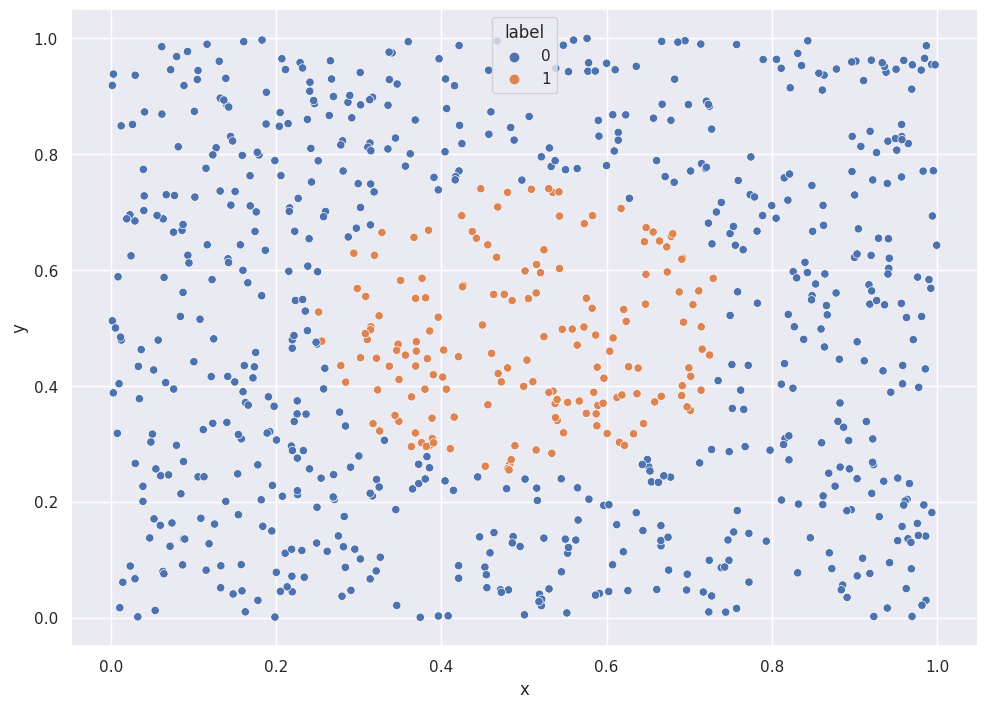

In [16]:
sns.scatterplot(data = train, x = "x", y = "y", hue = "label")

学習データの散布図

<AxesSubplot:xlabel='x', ylabel='y'>

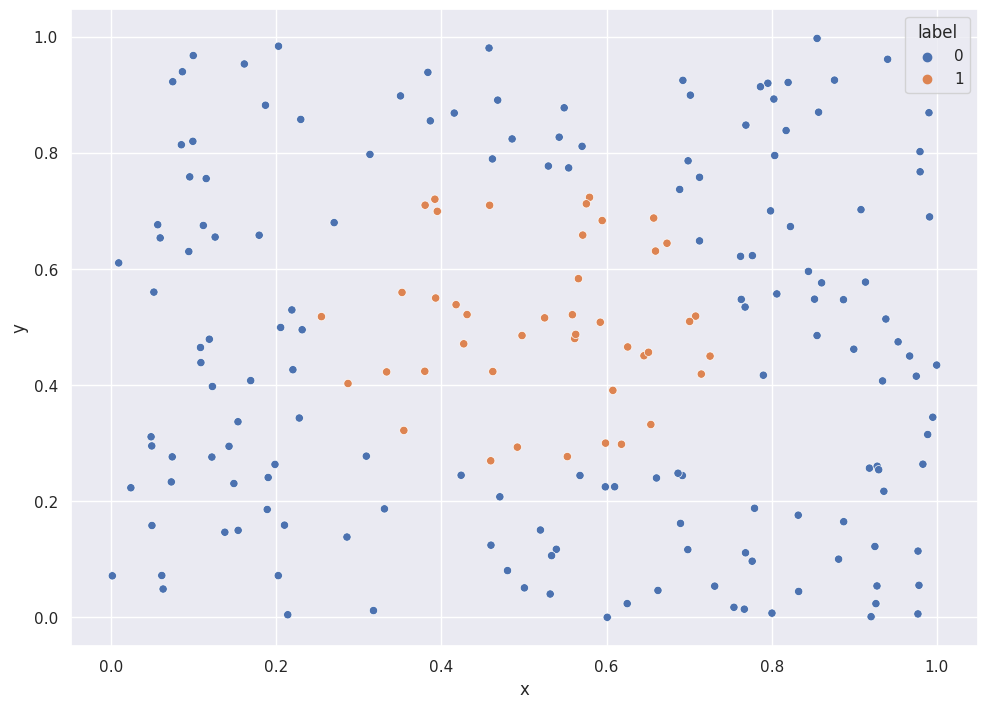

In [14]:
sns.scatterplot(data = test, x = "x", y = "y", hue = "label")

テストデータの散布図

### 1-2 ニューラルネットワークの構築

In [25]:
X_train = train.loc[:,["x","y"]].values
Y_train = train.loc[:,["label"]].values
Y_train = np.ravel(Y_train)

まずは、ニューラルネットワークモデルを学習させるためのXとYデータを分けておく
- X_train : 座標軸の学習データ
- Y_train : ラベルの学習データ

In [155]:
model = MLPClassifier(hidden_layer_sizes=(8,4,), alpha=0.5, max_iter=5000, random_state=1234)
model = model.fit(X_train, Y_train)

１階層に8つのニューロンがあり、２階層に４つのニューロンがあるモデルを構築し、学習させた

In [156]:
model.score(X_train, Y_train)

0.98

学習データにおける正確度は78%である

<AxesSubplot:xlabel='x', ylabel='y'>

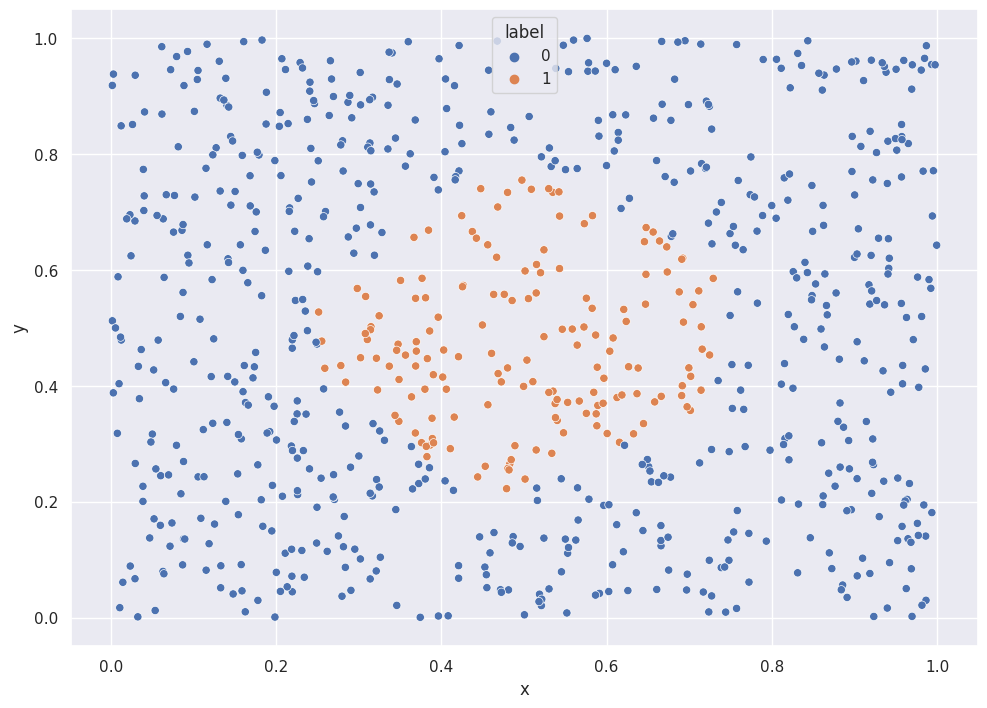

In [157]:
model_data = pd.DataFrame({"x":train.x, "y":train.y, "label":model.predict(X_train)})
sns.scatterplot(data = model_data, x = "x", y = "y", hue = "label")

モデルが予測した学習データにおけるラベルは上のようになる

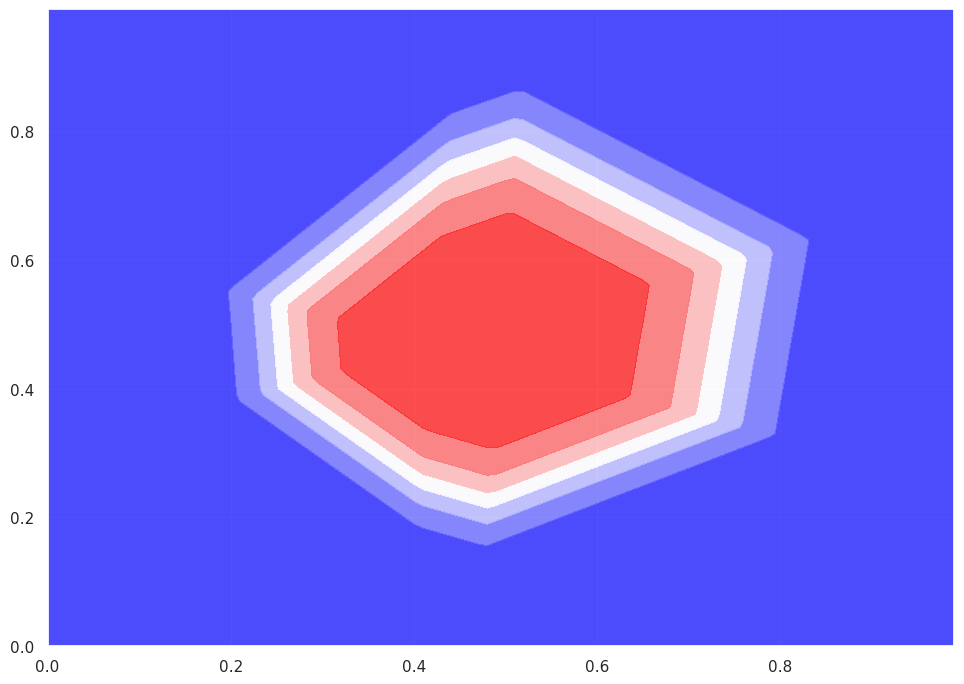

In [160]:
xx, yy = np.meshgrid(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01))
Z = model.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.8)

モデルが予測する範囲

## 1-3 ニューラルネットワークモデルの図式化

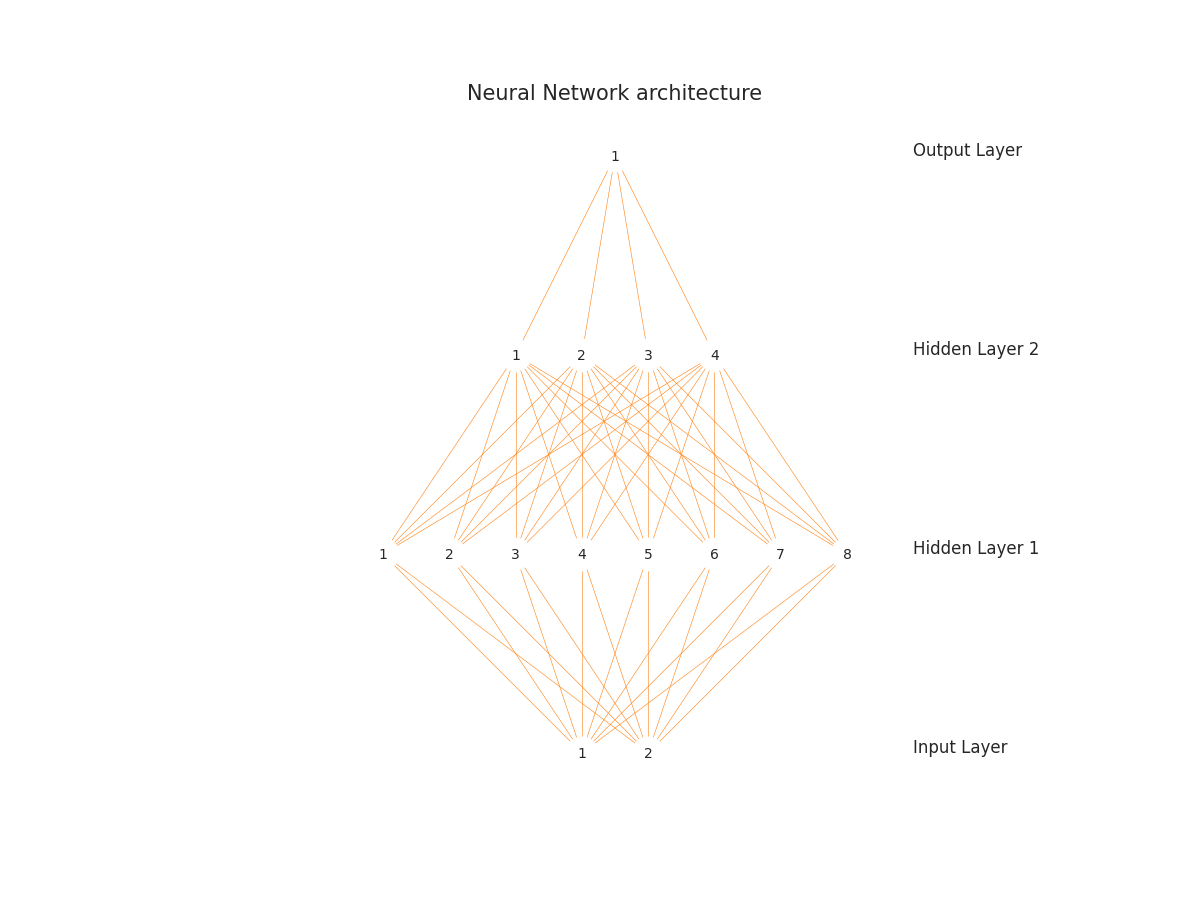

<Figure size 1200x900 with 0 Axes>

In [165]:
network_structure = np.hstack(([X_train.shape[1]], np.asarray(model.hidden_layer_sizes), [1]))
network=VisNN.DrawNN(network_structure)
network.draw()

モデルの各ニューロンは上のようにつながっている

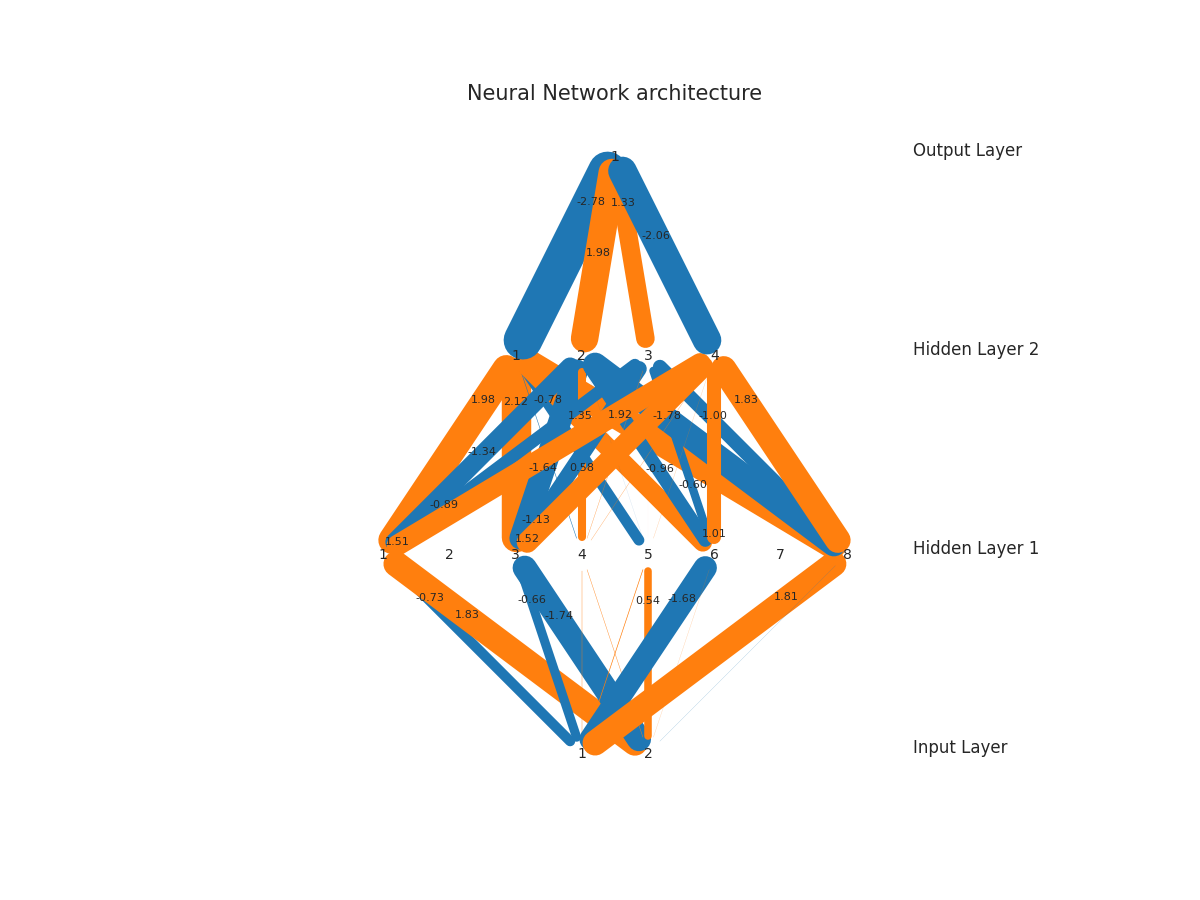

<Figure size 1200x900 with 0 Axes>

In [166]:
network=VisNN.DrawNN(network_structure, model.coefs_)
network.draw()

学習されたニューロンの間の連結を図式化した